In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Load Data

In [2]:
cu_path = '../data/futures_70/CU9999.csv'
cu_data = pd.read_csv(cu_path,
                      infer_datetime_format=True,
                      parse_dates=[1],
                      dtype={'open': 'int32',
                          'close': 'int32',
                          'high': 'int32',
                          'low': 'int32',
                          'money': 'int64',
                          'volume': 'int32',
                          'open_interest': 'int32'})
cu_data.drop('Unnamed: 0', axis=1, inplace=True)

## EDA

#### Random check

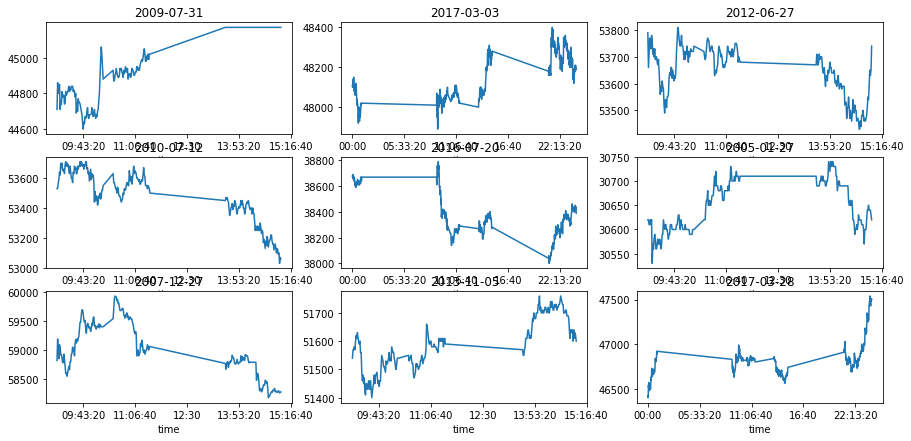

In [3]:
unique_dates = cu_data.date.map(lambda x: x.date()).unique()
sample_dates = np.random.choice(unique_dates, 9)
fig, axes = plt.subplots(3, 3, figsize=(15,7), squeeze=False)
for i, date in enumerate(sample_dates):
    plot_df = cu_data[cu_data.date.map(lambda x: x.date()==date)]
    x = plot_df.date.map(lambda x: x.time())
    y = plot_df.close
    ax = axes[i//3, i%3]
    ax.plot(x, y)
    ax.set_title(str(date))

#### 期货价格波动

In [29]:
time_intvals = [(i+1)*5 for i in range(12)]
max_min_list = []
for intval in time_intvals:
    df = cu_data.close\
                .rolling(intval)\
                .agg({'max': np.max,
                      'min': np.min})\
                .dropna()\
                .astype('int32')
    max_min = np.mean(df['max']-df['min'])
    max_min_list.append(max_min)

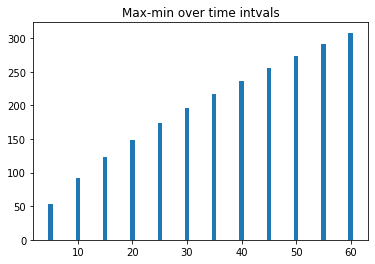

In [34]:
plt.bar(time_intvals, max_min_list)
plt.title('Max-min over time intvals')
plt.show()

In [39]:
spread = 20
unit = 5
cost = 15
print('Possible profits over time interval: ', (np.array(max_min_list)-spread)*unit - cost)

Possible profits over time interval:  [ 150.6708187   344.31417087  497.59167212  630.62833206  750.88681374
  862.28439808  966.95310353 1066.25913691 1161.15777616 1252.56408437
 1340.89801243 1426.29124622]


In [40]:
cu_data.high-cu_data.open

,date,open,close,high,low,volume,money,open_interest
0,2005-01-04 09:01:00,29110,29080,29170,29080,3158,459908300,121604
1,2005-01-04 09:02:00,29080,29100,29100,29030,1970,286417600,121806
2,2005-01-04 09:03:00,29110,29060,29110,29060,1418,206240600,122000
3,2005-01-04 09:04:00,29060,29070,29080,29050,942,136908100,122024
4,2005-01-04 09:05:00,29080,29070,29090,29060,1134,164892800,122198
